In [ ]:
import cv2 as cv
import numpy as np
from shapely.geometry import Polygon, Point
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Анализ изображения

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

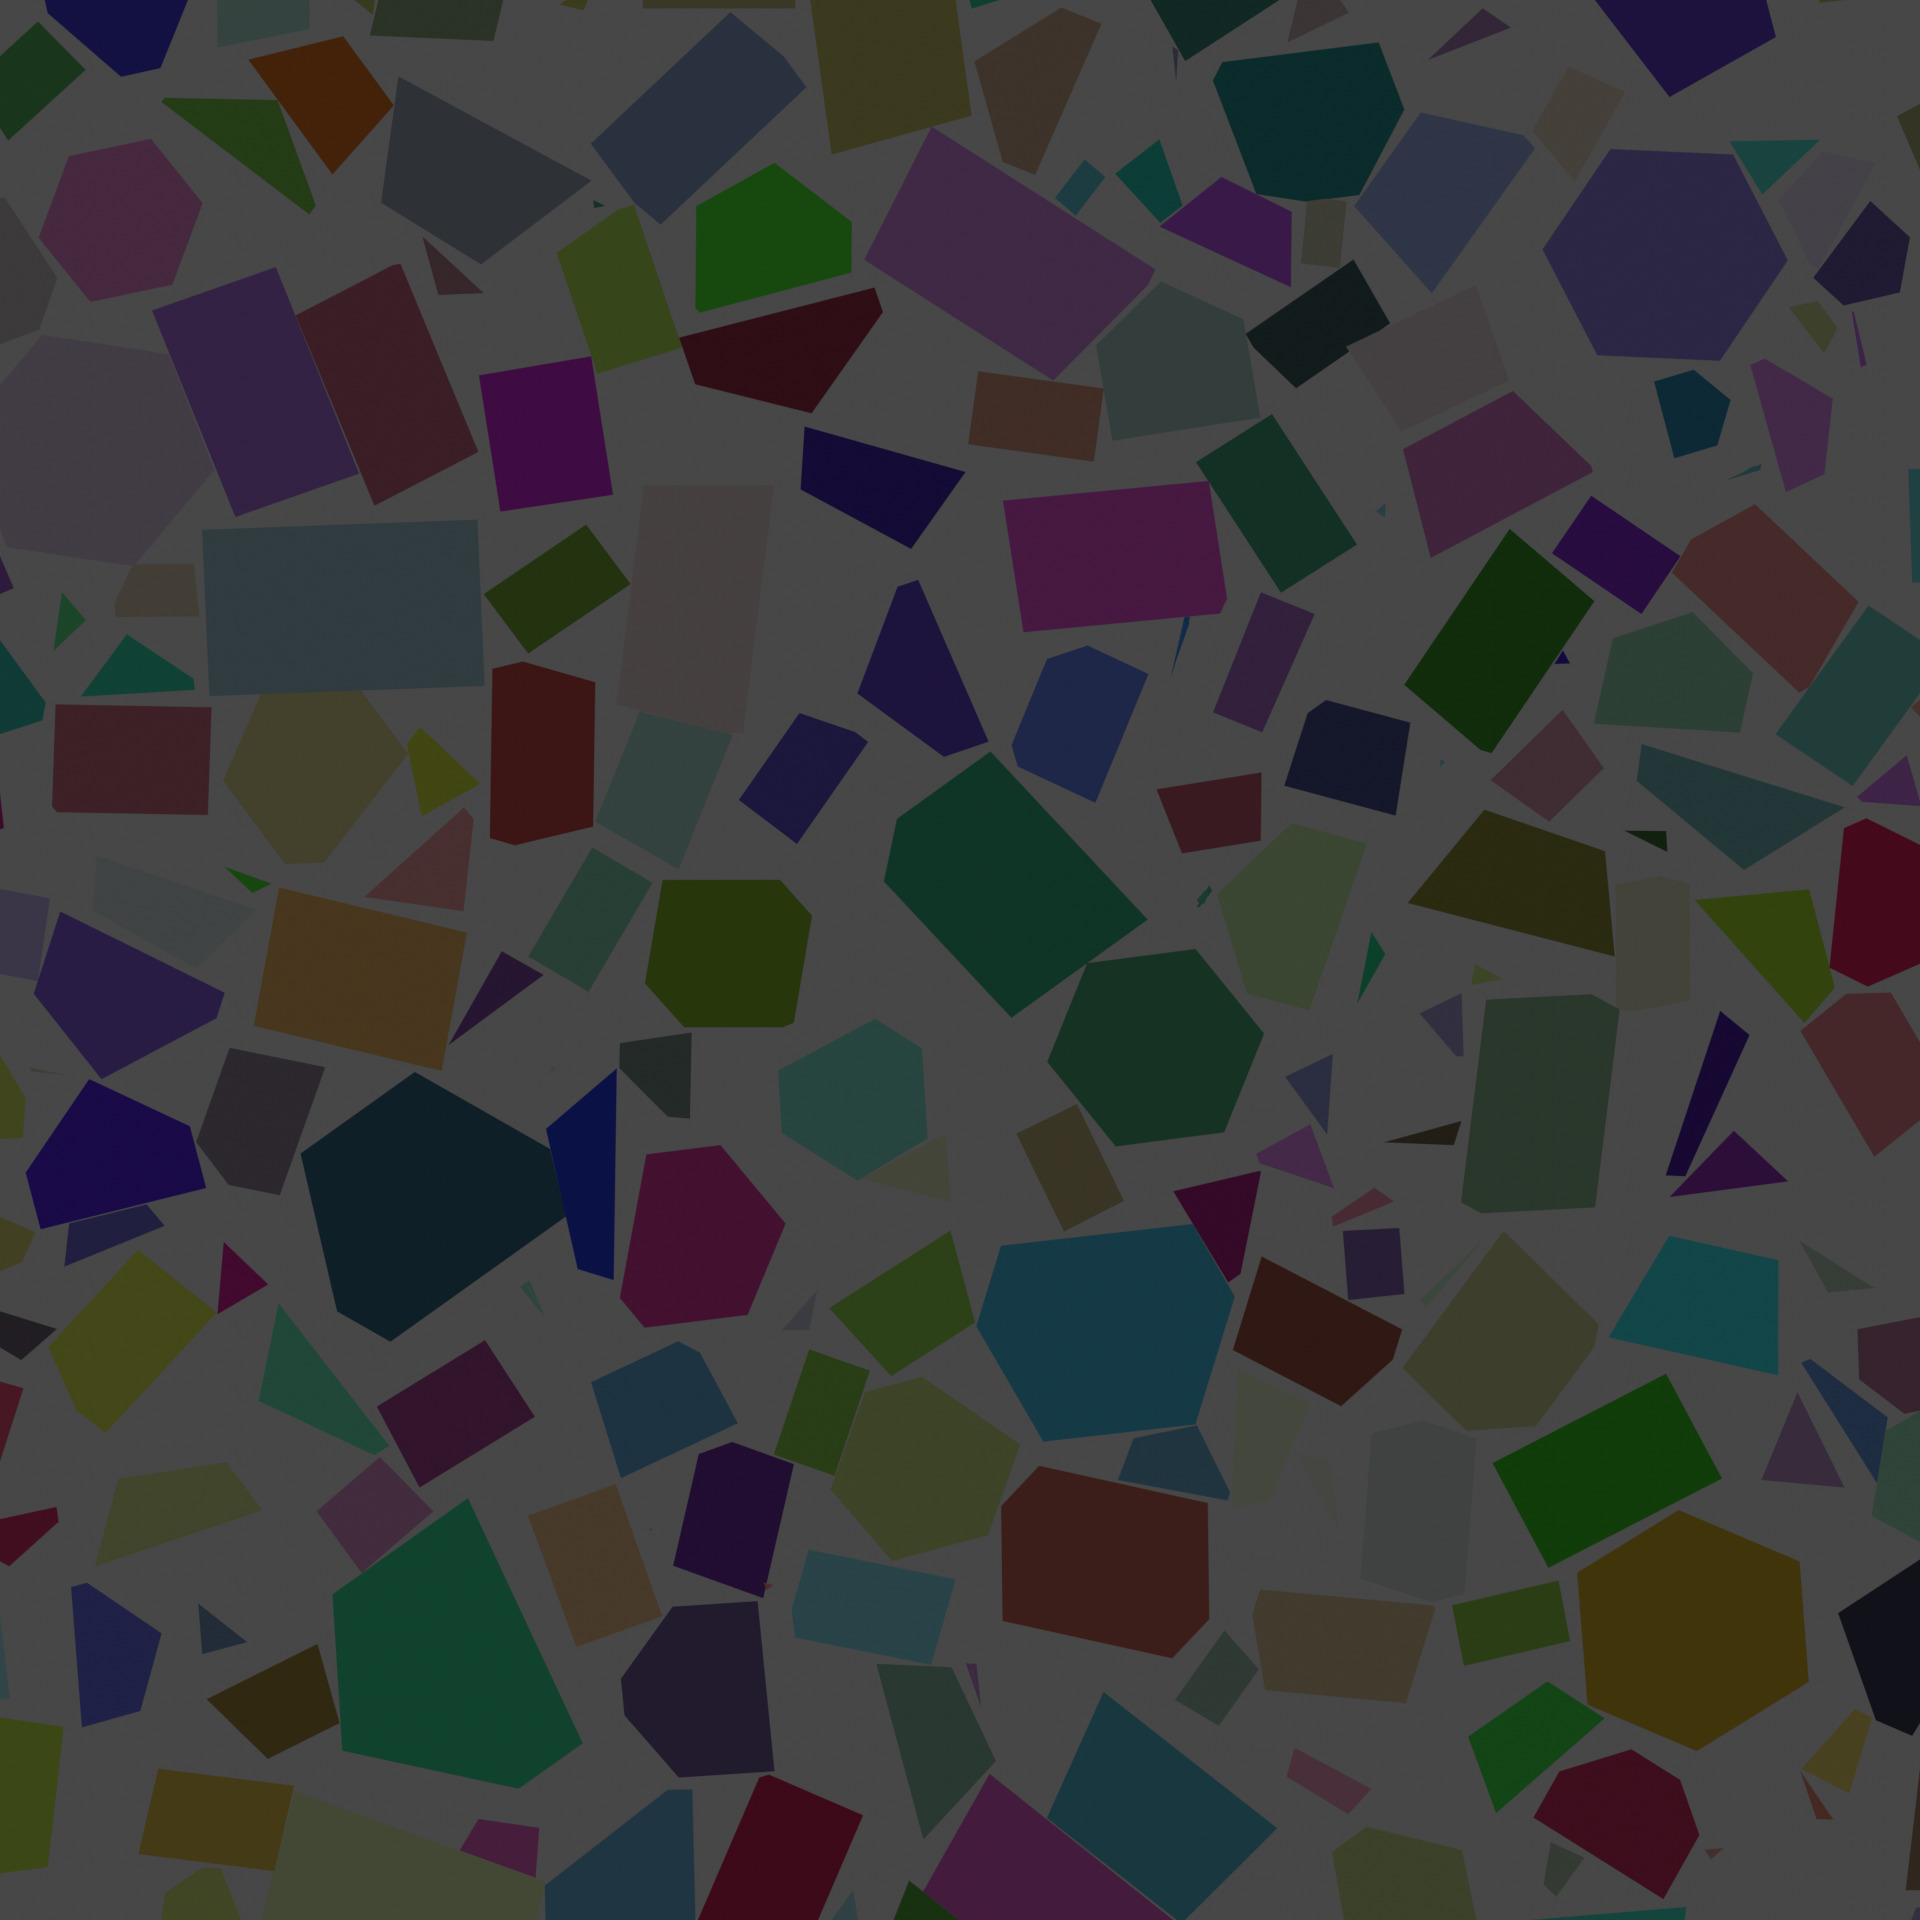

In [ ]:
img2 = cv.imread("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg")
cv2_imshow(img2)

Гистограммы на обычном изображении

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


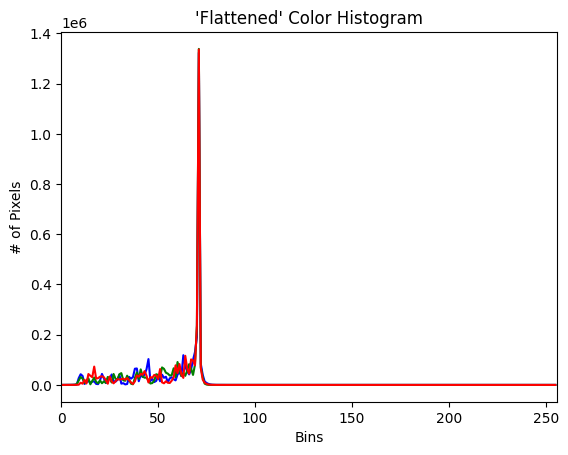

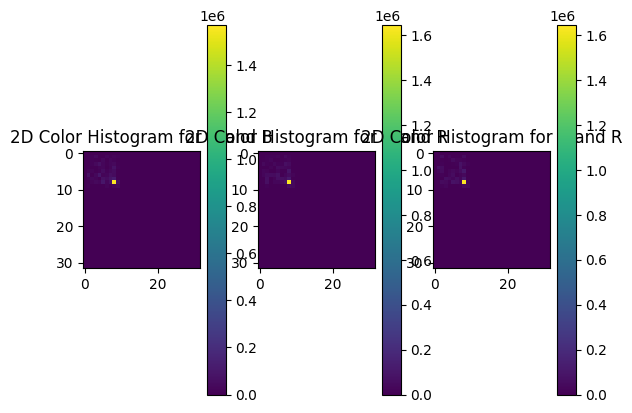

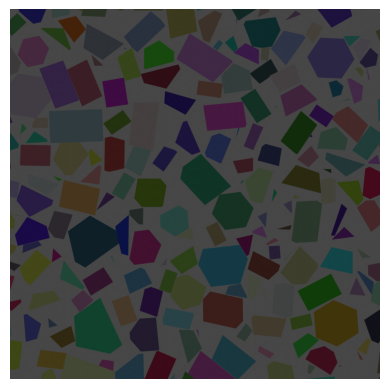

In [ ]:

from matplotlib import pyplot as plt
import argparse
import imutils
import cv2



image = cv.imread("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg")

chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
for (chan, color) in zip(chans, colors):
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)


print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

plt.show()

(0.0, 255.0)

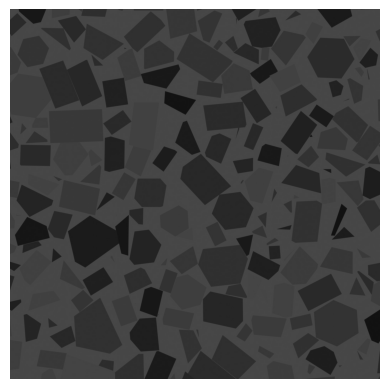

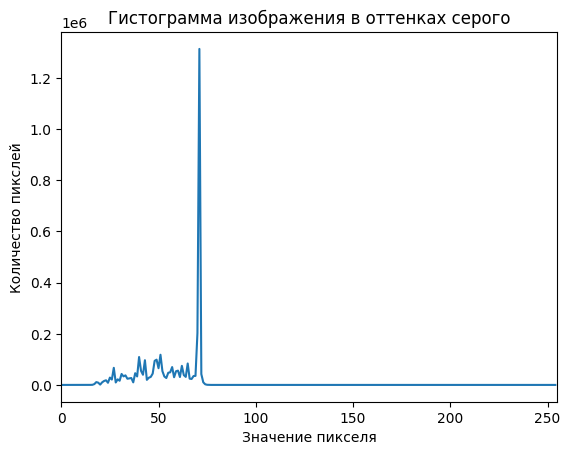

In [ ]:
image = cv.imread("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg")
# image = cv.medianBlur(image, 7)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [255], [0, 255])
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

plt.figure()
plt.title("Гистограмма изображения в оттенках серого")
plt.xlabel("Значение пикселя")
plt.ylabel("Количество пикслей")
plt.plot(hist)
plt.xlim([0, 255])

Сложим все пиксели, которые которые соответсвуют локальным максимумам и их значения меньше 65

2
5
10
14
17
21
23
25
30
34
36
38
40
42
46
48
50
55
59


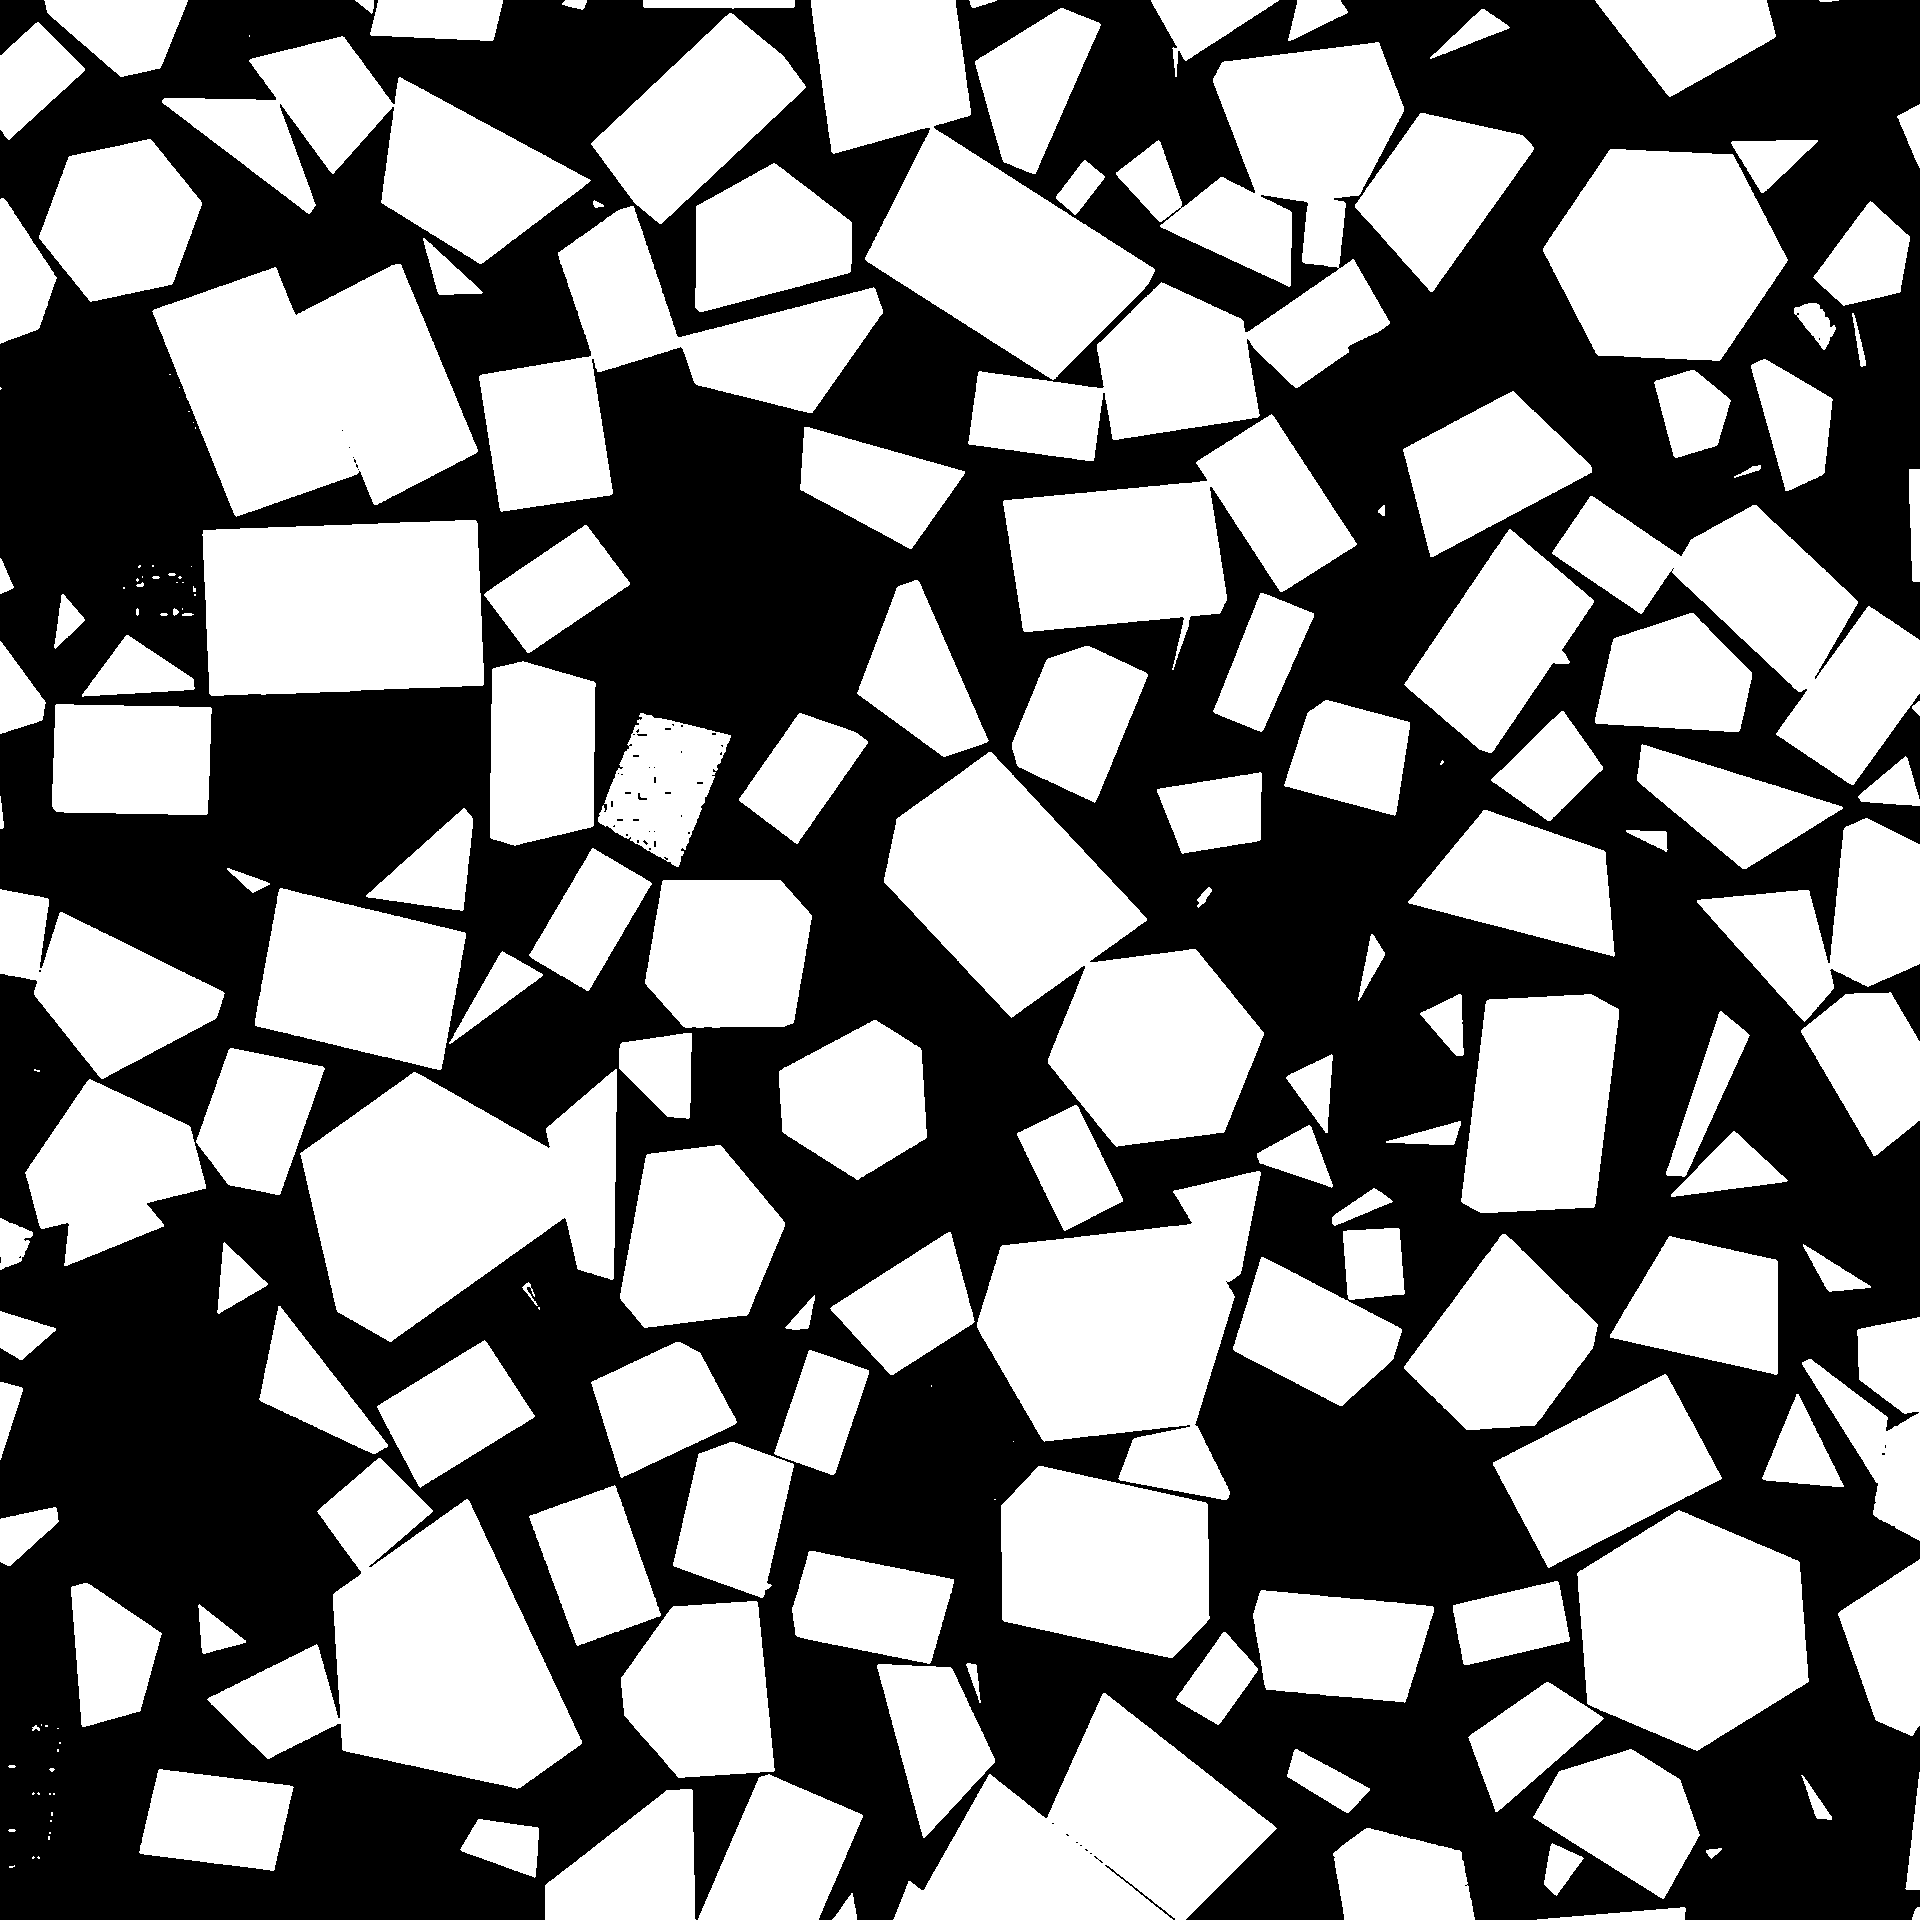

In [ ]:
hist = hist[:65]
eps = 2
image = cv.imread("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg", cv.IMREAD_GRAYSCALE)
image = cv.medianBlur(image, 3)
thresh = np.zeros(np.shape(image))
for i in range(1, np.shape(hist)[0] - 1):
  if hist[i - 1] < hist[i] and hist[i] > hist[i + 1]:
    print(i)
    thresh += cv.inRange(image, np.array(i - eps), np.array(i + eps))
cv2_imshow(thresh)

Сложим все пиксели, которые которые соответсвуют локальным минимумам и их значения меньше 65

1
4
7
12
16
19
22
24
27
31
35
37
39
41
45
47
49
52
58
62


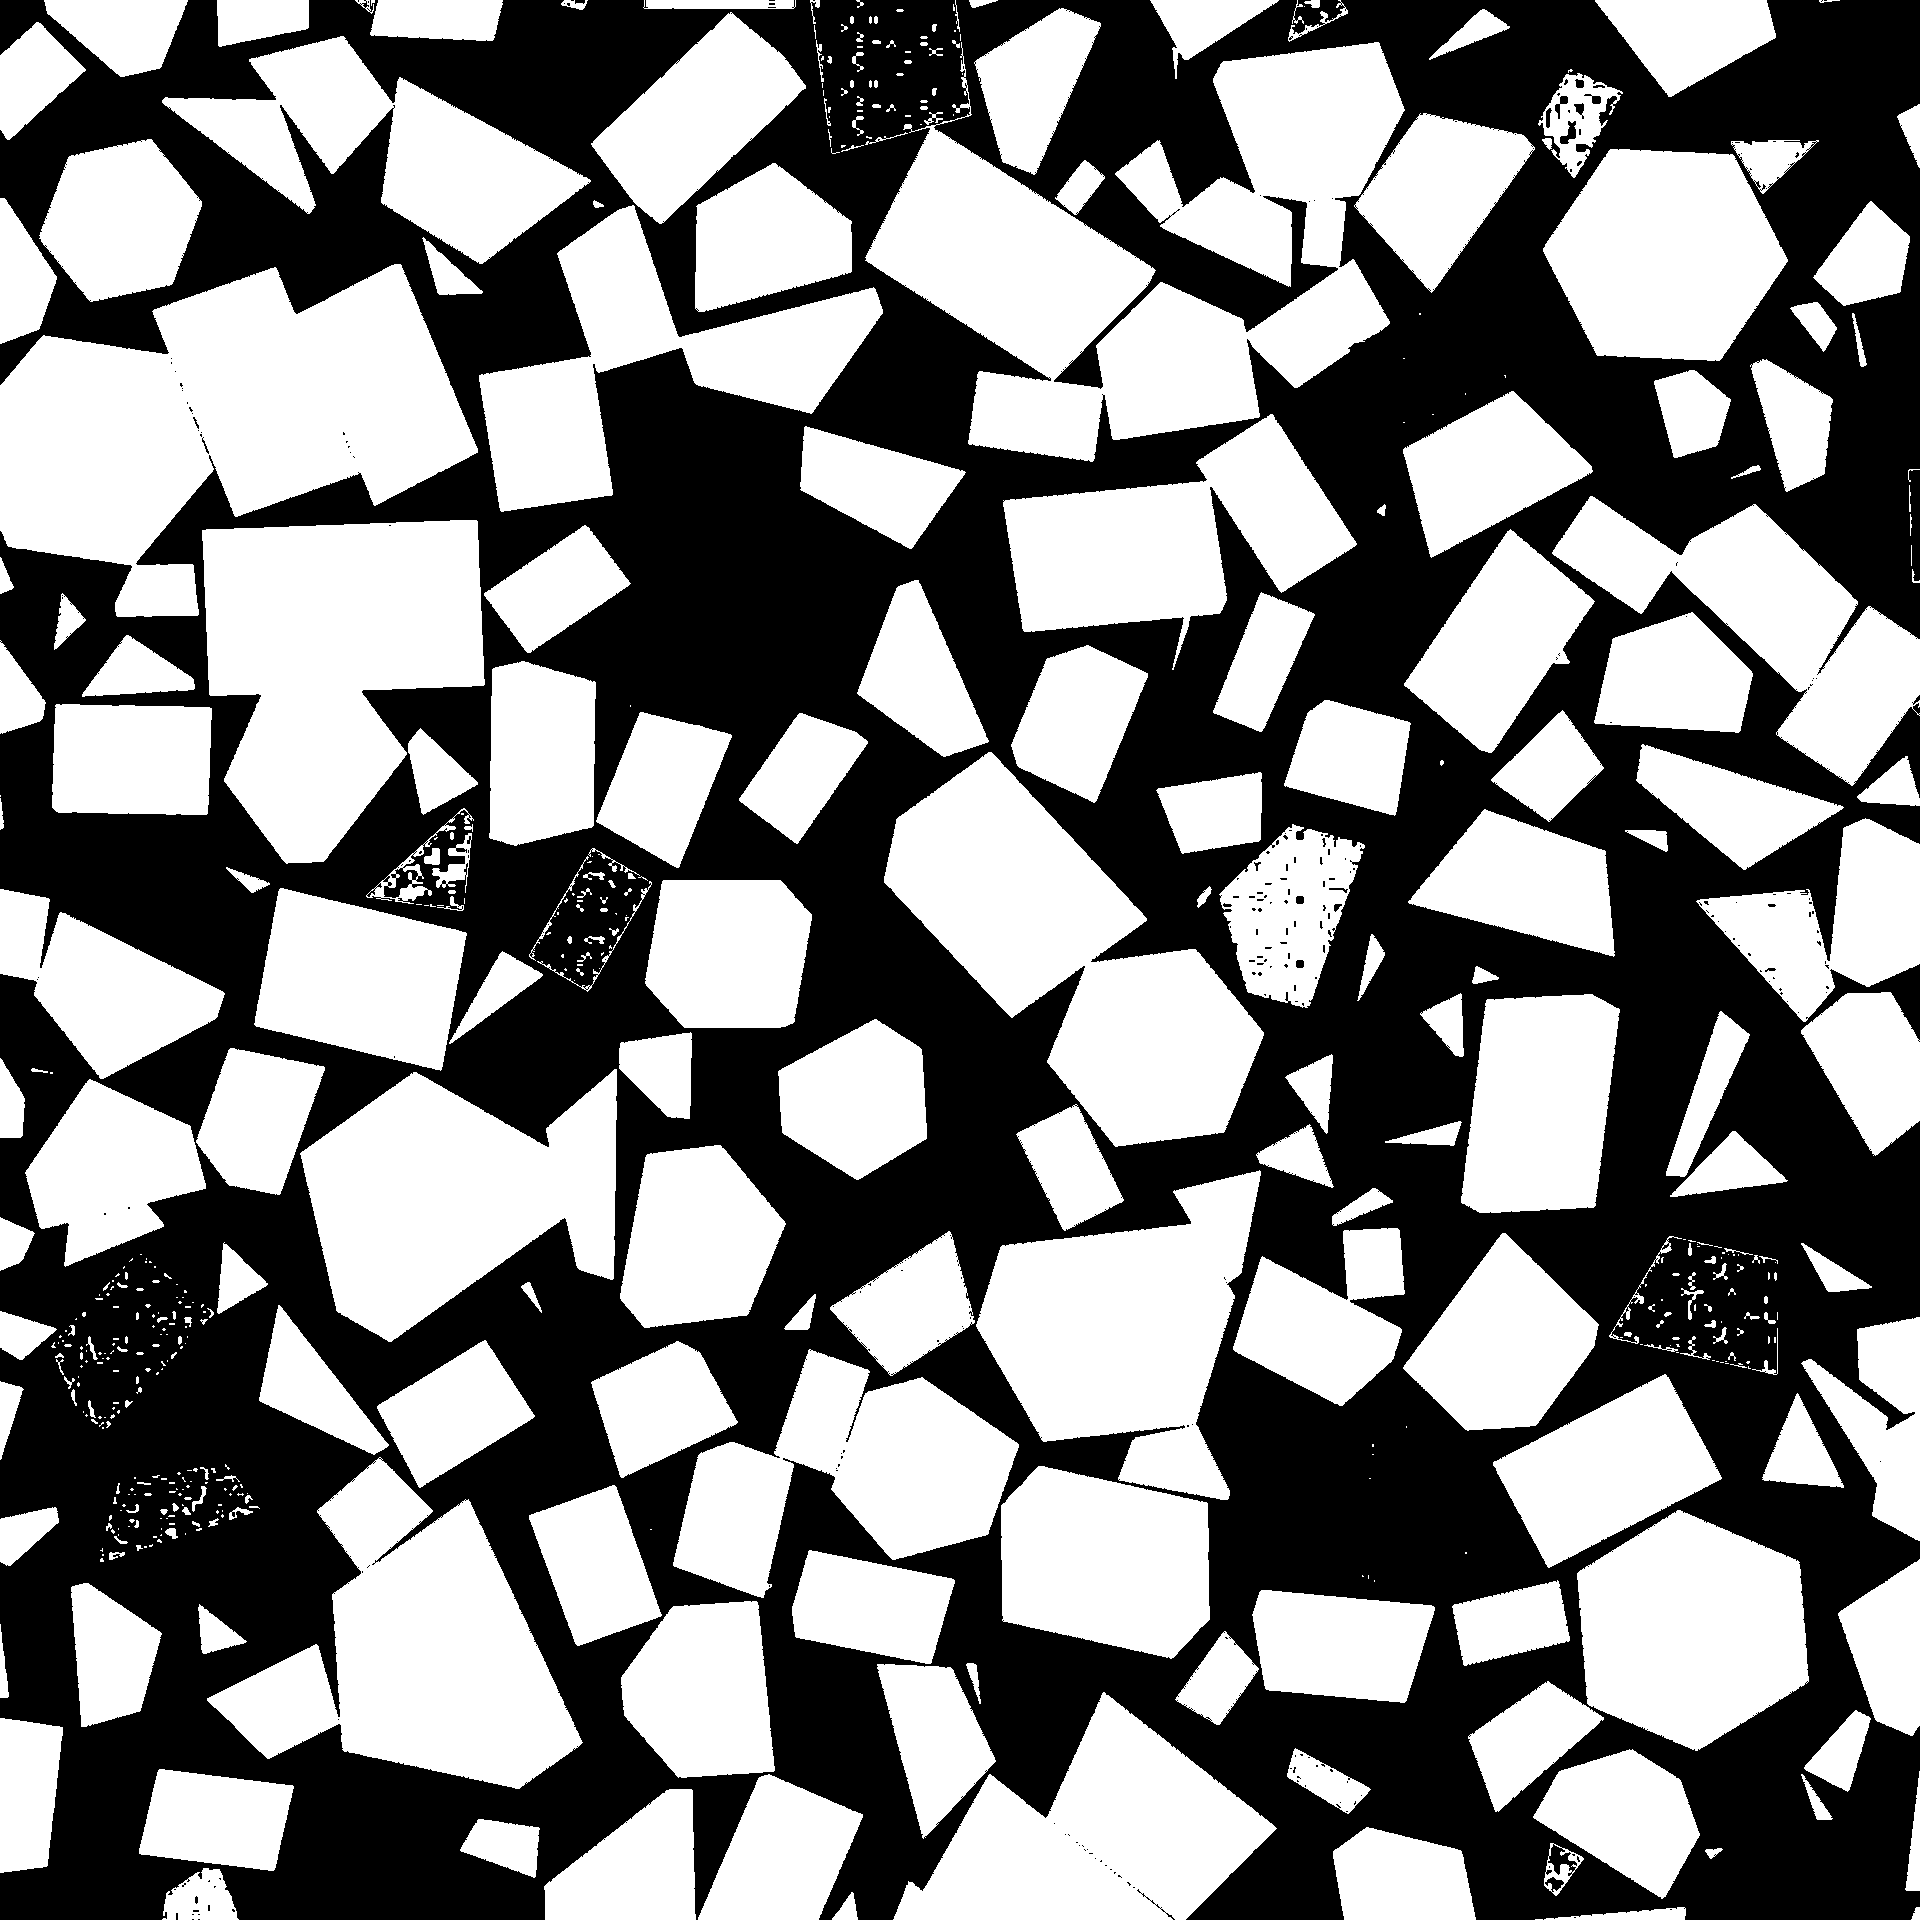

In [ ]:
eps = 2
image = cv.imread("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg", cv.IMREAD_GRAYSCALE)
image = cv.medianBlur(image, 3)
thresh = np.zeros(np.shape(image))
for i in range(1, np.shape(hist)[0] - 1):
  if (hist[i - 1] > hist[i] and hist[i] < hist[i + 1]):
    print(i)
    thresh += cv.inRange(image, np.array(i - eps), np.array(i + eps))
cv2_imshow(thresh)

Сложим все пиксели, которые которые соответсвуют локальным максимумам и минимумам и их значения меньше 65

1
2
4
5
7
10
12
14
16
17
19
21
22
23
24
25
27
30
31
34
35
36
37
38
39
40
41
42
45
46
47
48
49
50
52
55
58
59
62


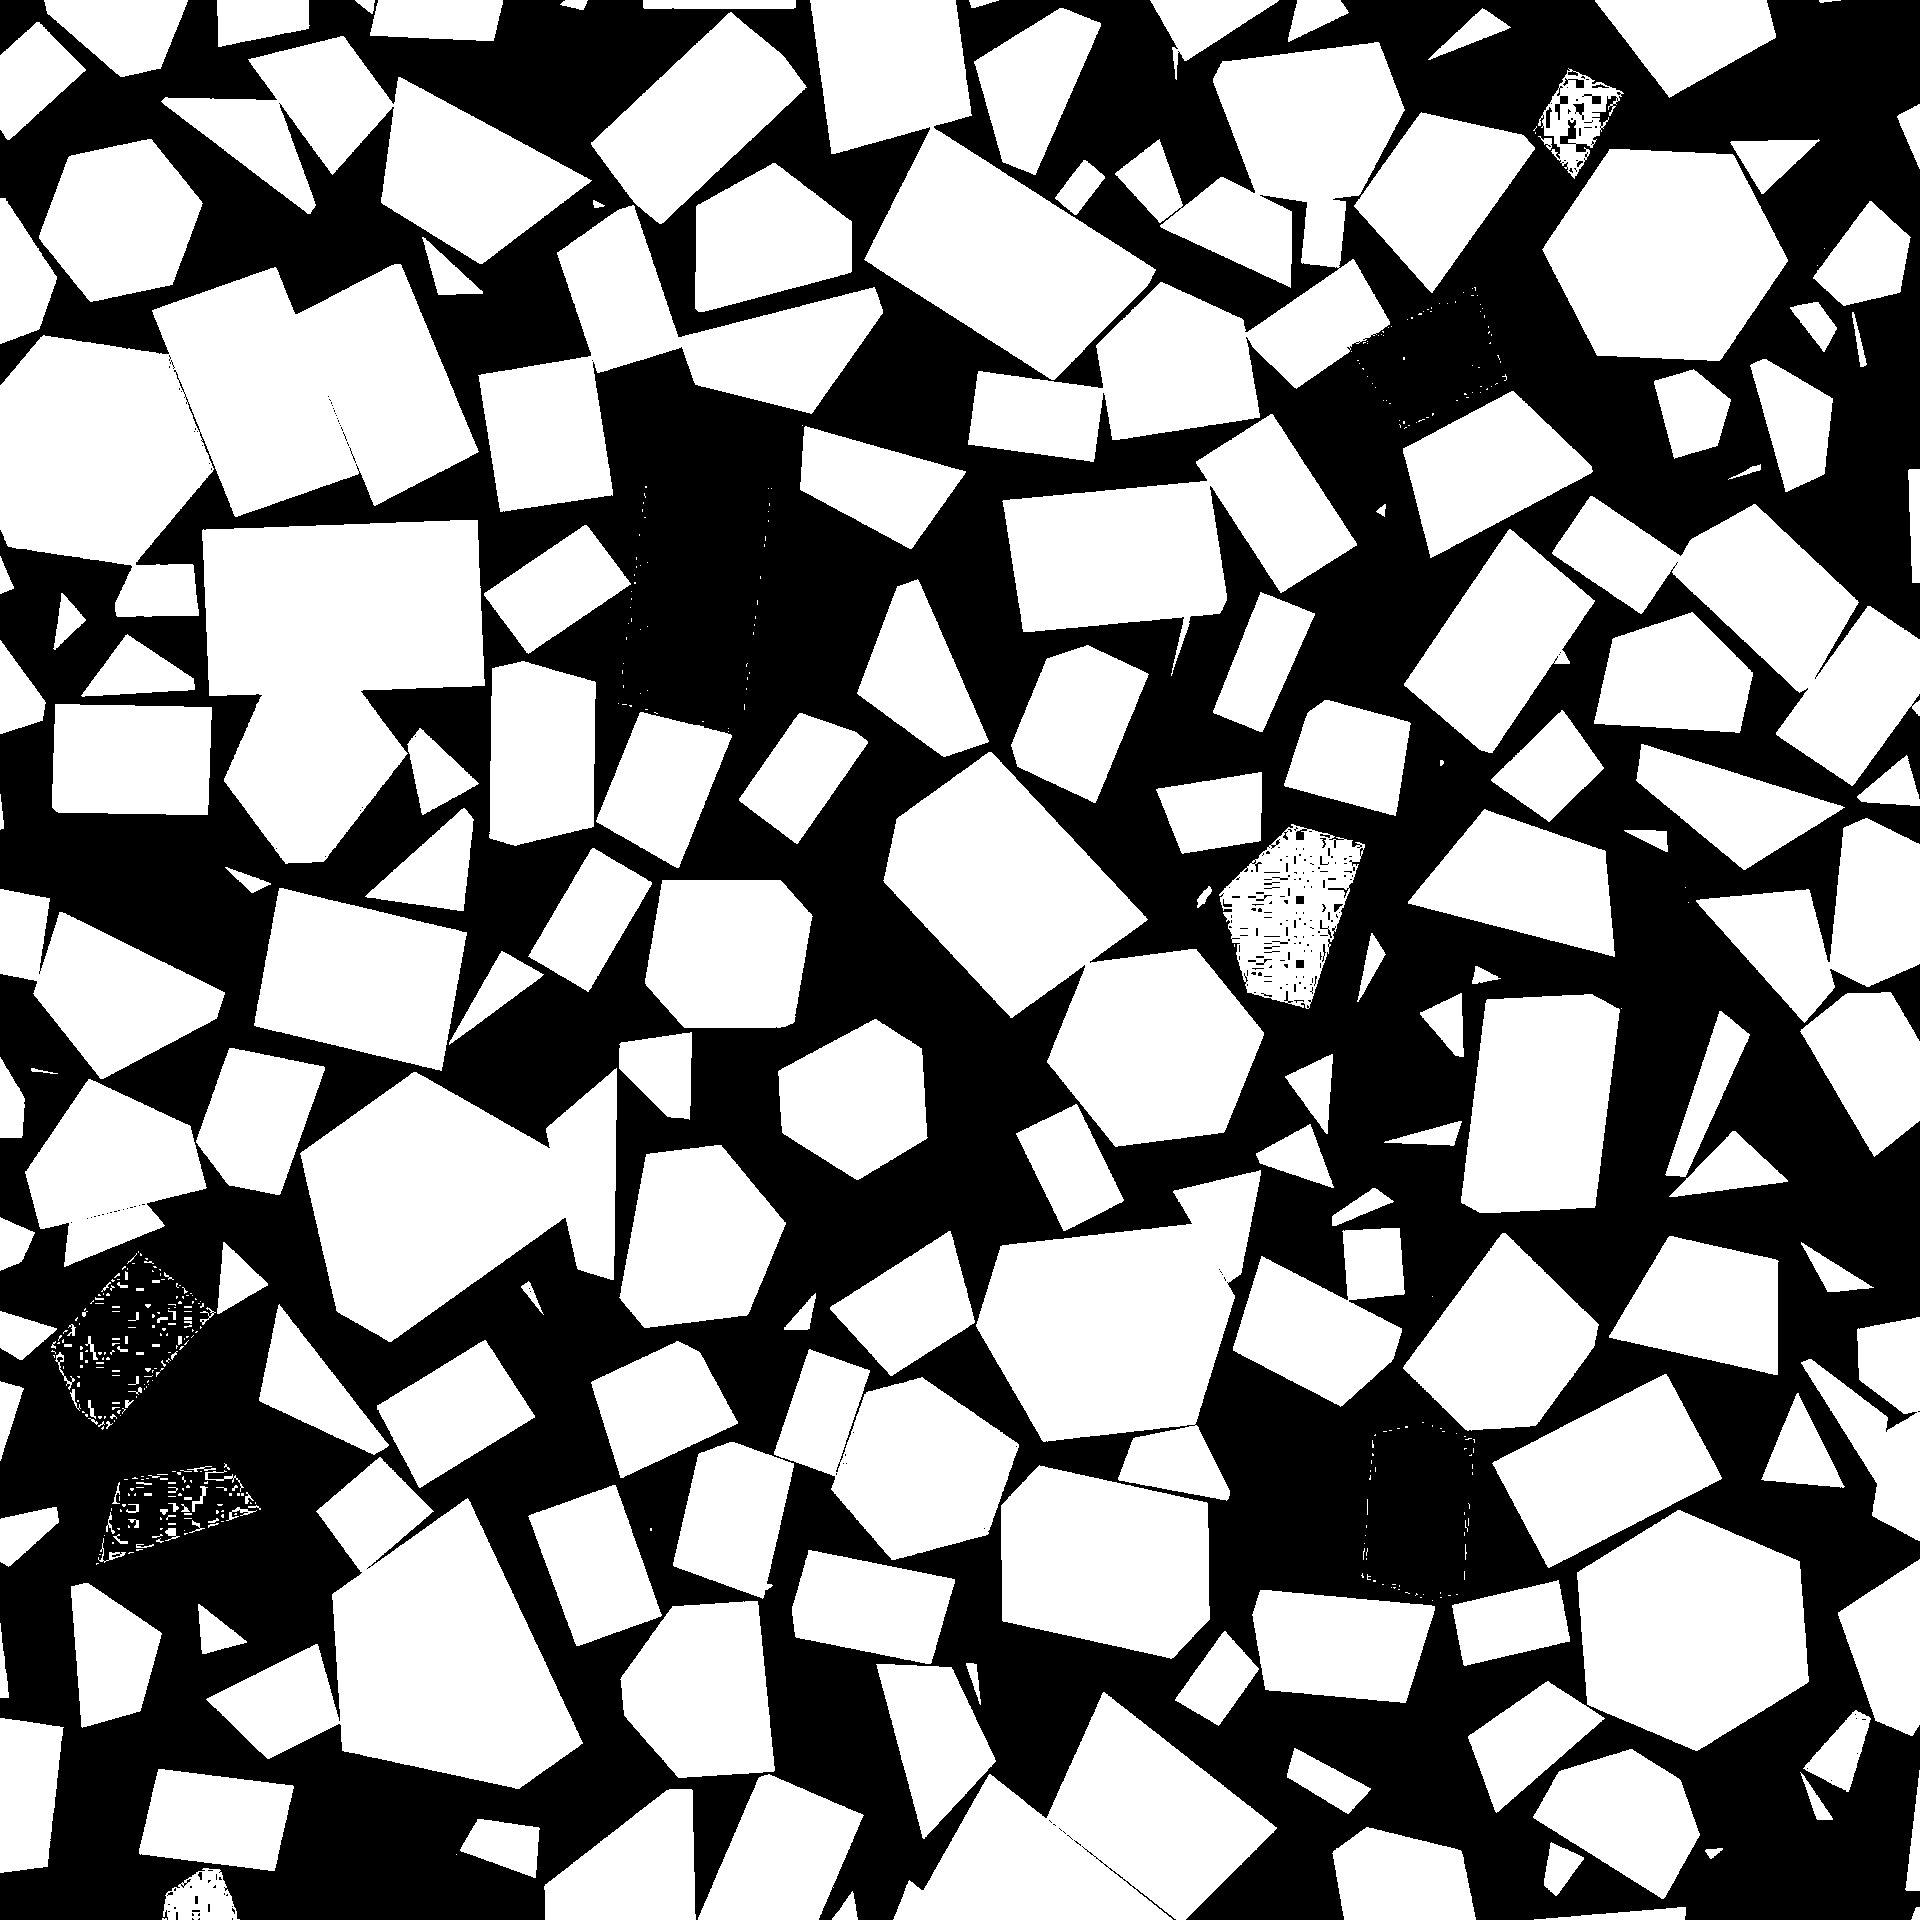

In [ ]:
eps = 2
image = cv.imread("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg", cv.IMREAD_GRAYSCALE)
# image = cv.medianBlur(image, 3)
thresh = np.zeros(np.shape(image))
for i in range(1, np.shape(hist)[0] - 1):
  if (hist[i - 1] > hist[i] and hist[i] < hist[i + 1]) or (hist[i - 1] < hist[i] and hist[i] > hist[i + 1]):
    print(i)
    thresh += cv.inRange(image, np.array(i - eps), np.array(i + eps))
cv2_imshow(thresh)

# Алгоритм высветления изображения

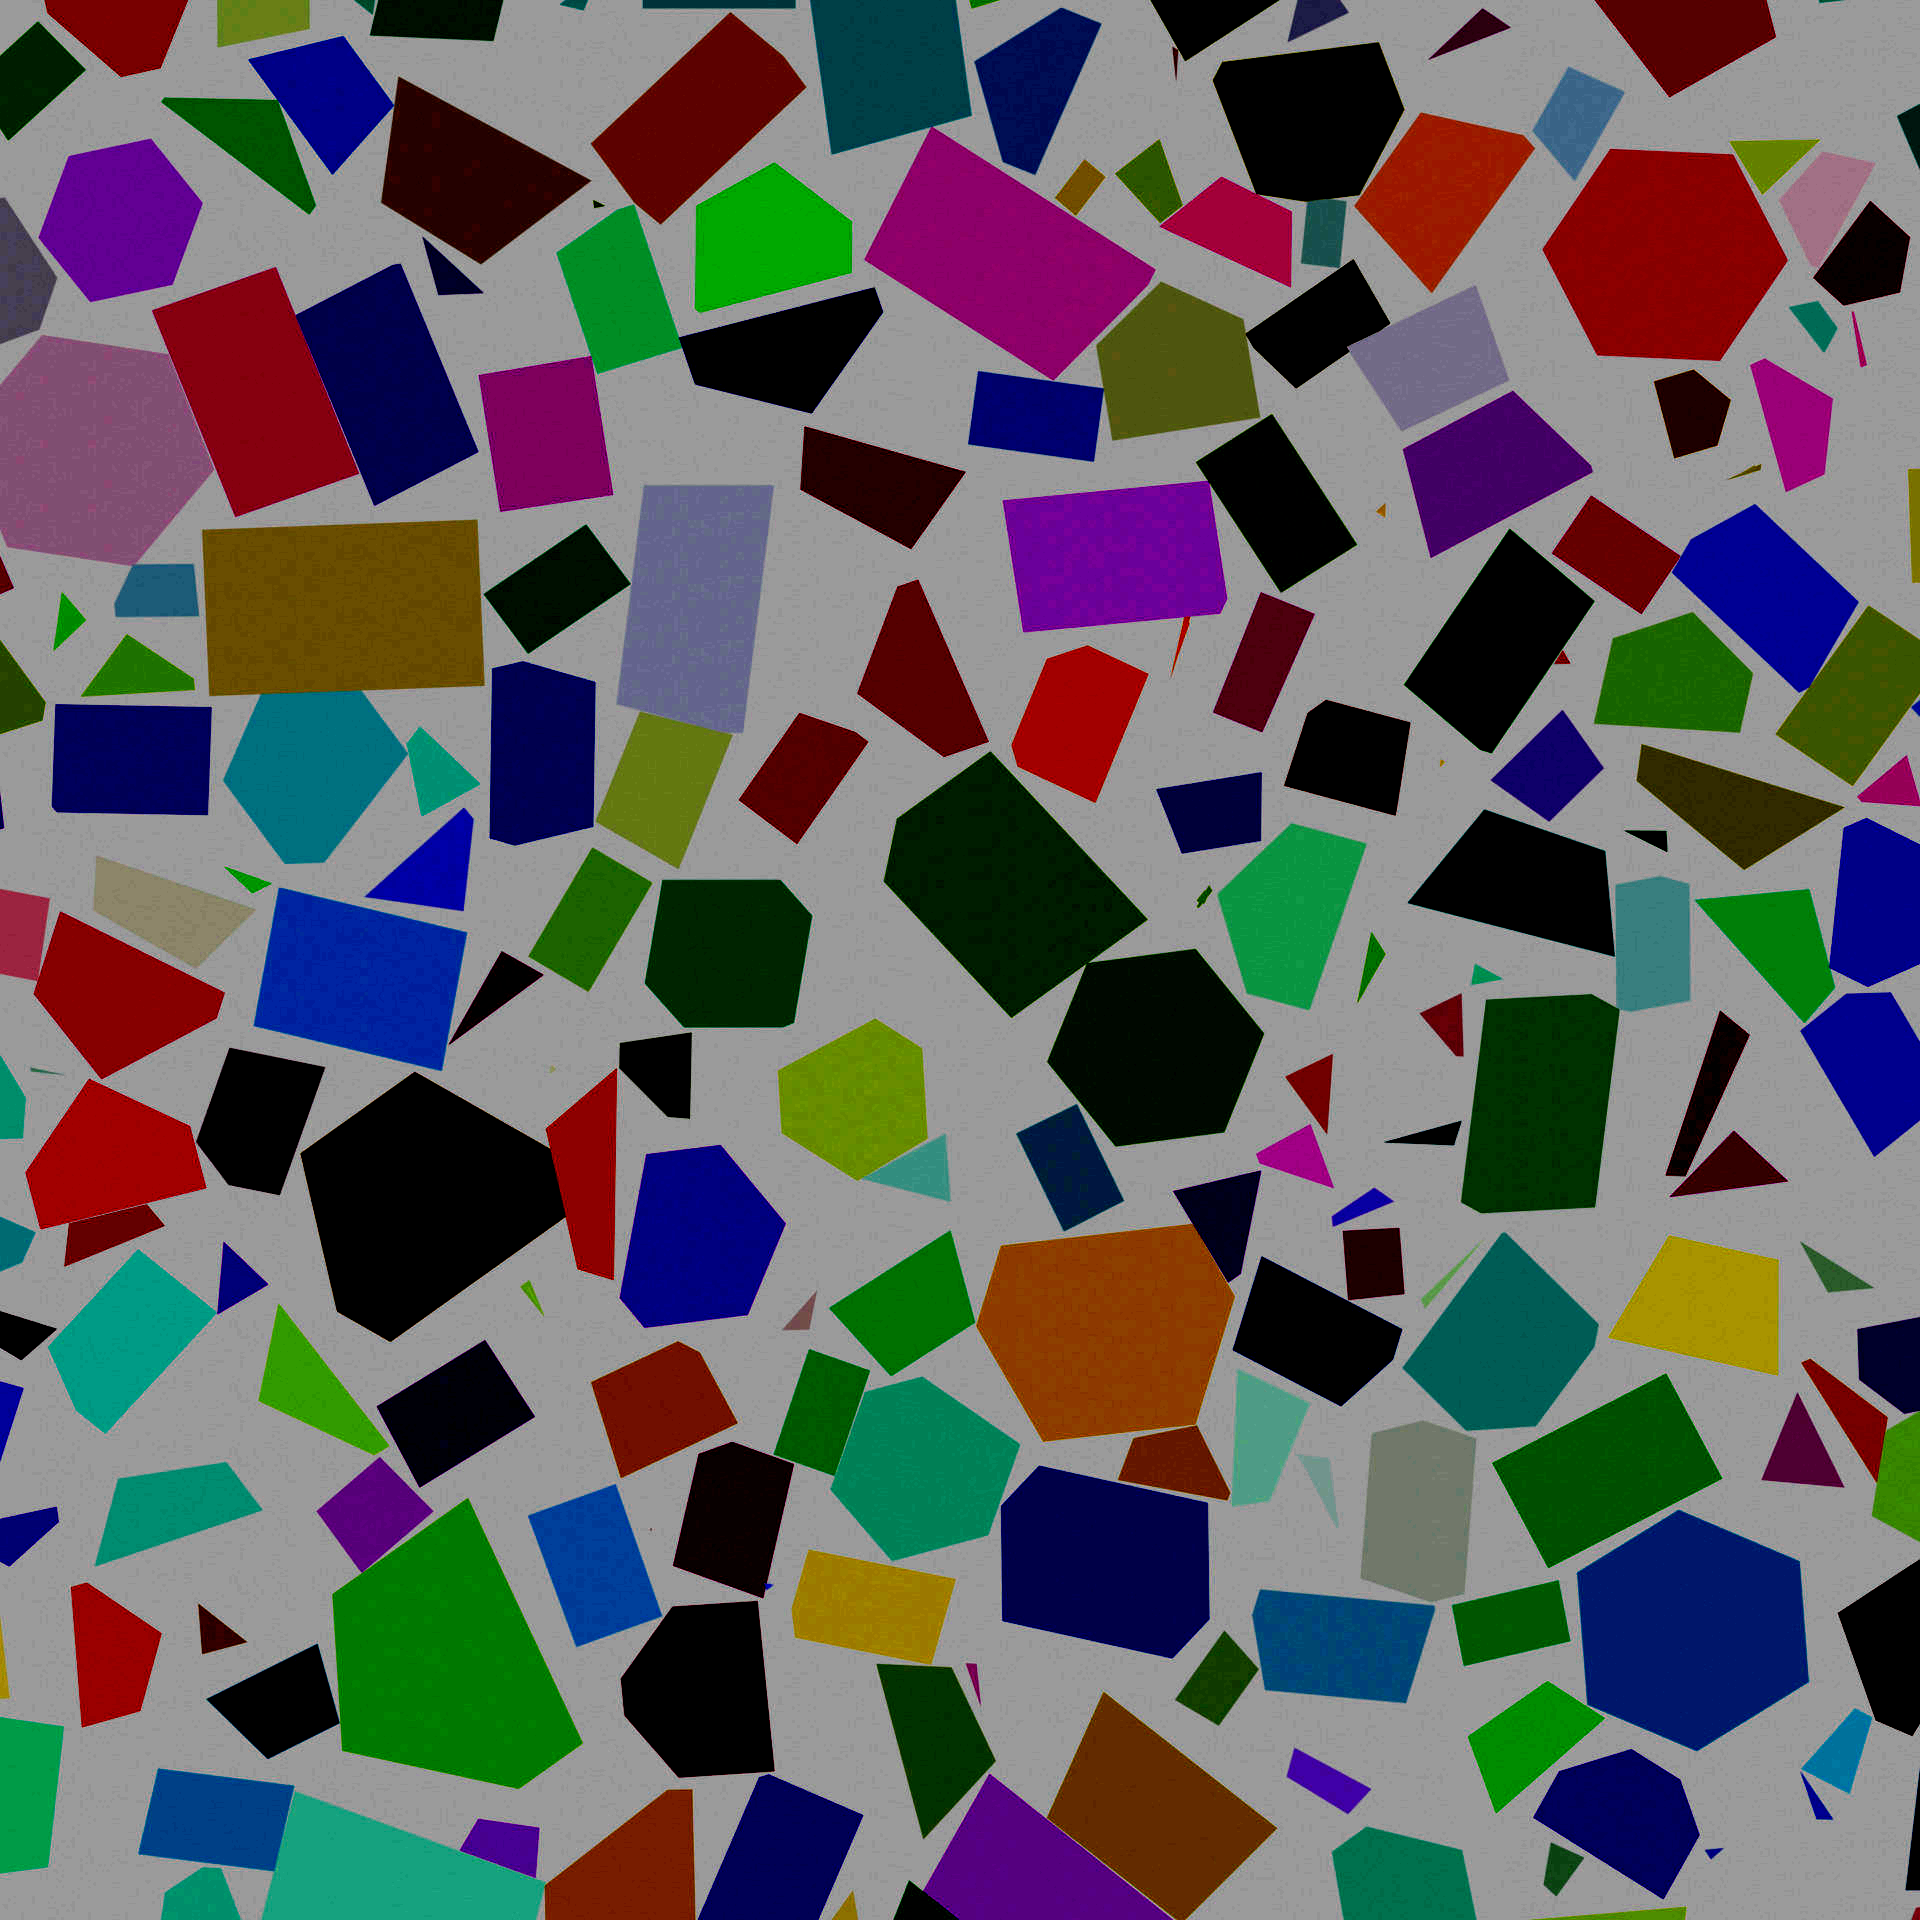

(0.0, 255.0)

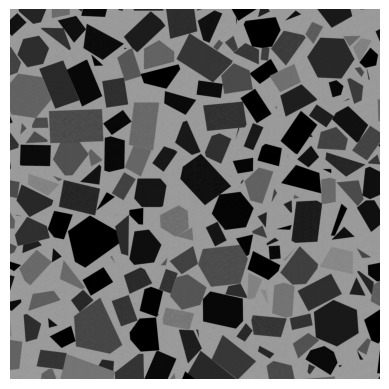

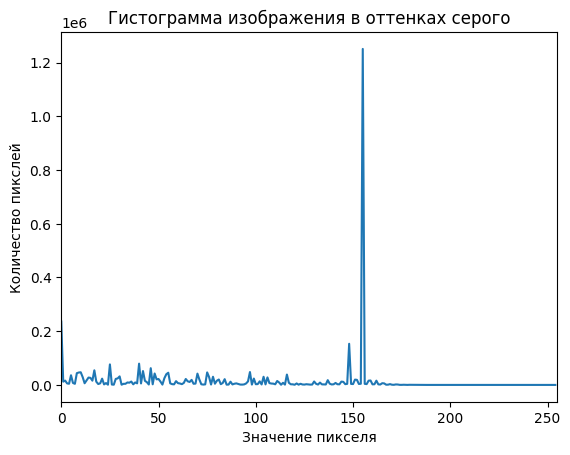

In [ ]:
from PIL import Image, ImageEnhance 
#read the image 
im_output = Image.open("/content/drive/MyDrive/WC_Co/liza_grains_4.jpg") 
#image brightness enhancer 
enhancer = ImageEnhance.Contrast(im_output)
factor = 7
#increase contrast 
im_output = enhancer.enhance(factor)
im_output = np.array(im_output)
# for i in range(np.shape(im_output)[0]):
#   for j in range(np.shape(im_output)[1]):
#     im_output[i, j] = ((im_output[i, j] / 255) ** 0.5) * 255
# im_output = cv.medianBlur(np.array(im_output), 3)
cv2_imshow(im_output)

image = cv2.cvtColor(im_output, cv2.COLOR_BGR2GRAY)

# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [255], [0, 255])

# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Гистограмма изображения в оттенках серого")
plt.xlabel("Значение пикселя")
plt.ylabel("Количество пикслей")
plt.plot(hist)
plt.xlim([0, 255])

вывод: диапазон значениний пикселей растянулся, изображение стало светлее, но ощутимых результаов при сегментировании не дало